# <div style="text-align: center">Calibration</div>

<div style="text-align: center"> <sub>ENCN404 - Modern Modelling Practices in Civil Engineering</sub></div>

$\,$

<div style="text-align: center"> University of Canterbury </div>

$\,$

<img src="img/calibration_title.png" alt="Drawing" style="width: 300px;"/>

In [21]:
# imports and environment: this cell must be executed before any other in the notebook
from calibration404 import*

## 2 Calibrating Mathematical Models

Generally, the first time a model is “run” (i.e., *inputs* are passed to a *simulator* and an *output* obtained) the results bear little semblance to reality. This is because most mathematical models require as an input a vector of parameter values, $\boldsymbol{\theta}$, and, often, the values of some of those parameters are known only to within some uncertain range, or not at all. 

Recall the example of a car’s vertical motion with damped shock absorption (Design notes, Section 1.1). We said that the parameter $c$, which characterizes the viscous response of the shock absorber, is unknown, and that the spring stiffness, $k$, is known to lie somewhere in the range $[k_{min},k_{max}]$. Unfortunately, we cannot get on to the business of predicting the car’s behaviour in some future situation (which might be the objective of the model) until we have, at least approximate, values for $c$ and $k$.

***Execute the cell below and answer the questions.***

In [22]:
suspension_model()

In [26]:
# Press the ROLL THE DICE button. What changes each time? What stays the same?

# Is the model above a good representation of reality?

# How could you quantify "representation of reality"?

# What could you do to improve the model?

# Explain the difference between:
# (1) Creating a model.
# (2) Modifying a model so that it is a good representation of reality.



***Calibration*** is the process of choosing parameter values such that the model is a good approximation of reality. This is sometimes called *model-fitting*. When calibration is undertaken for the *express purpose* of learning a parameter’s value, then it is called *inverse modelling* or *parameter estimation*. For this module, you will be assessed on your ability to undertake two methods of calibration: *ad-hoc* and *gradient descent*, and to apply your understanding of calibration in an inverse modelling context. 

### 2.1 Calibration formalised

Recall the algebraic definition of a model with independent variables, $\mathbf{x}$, accepting input parameters, $\boldsymbol{\theta}$, and yielding, via the operator, $f(\cdot)$, the output (dependent variable), $y$, i.e.,

\begin{equation}
y=f(x;\boldsymbol{\theta}).
\end{equation}

Imagine also that we have a set of observations, $\tilde{y}_i$, corresponding to $\mathbf{x}_i$ (e.g., if $\mathbf{x}=[x,t]$, then the observations are made at location, $x_i$, and at time, $t_i$). For a particular set of parameter values, $\boldsymbol{\theta}$, the model *prediction* of the observation is $y_i=f(\mathbf{x}_i;\boldsymbol{\theta})$. But the model prediction will probably be *wrong*. The misfit is $\tilde{y}_i - y_i$.

We can improve the model by reducing the overall misfit to *all* observations. For instance, for $N$ observations we could minimise the sum of squared residuals

\begin{equation}
S=\sum\limits_{i=1}^N\left(\tilde{y}_i-y_i\right)^2.
\end{equation}

Sometimes we might choose to prioritise the model fit with some particular observations over others, for instance: 

- If we should *prefer* that the model fits one type of observation better than another, e.g., it is more important that the model fits temperature measurements than pressure; or, it is more important that the model fits the more recent measurements than the older ones.
- If some measurements have more uncertainty/error than others.

In this case, we can use the weighted sum-of-squares criterion, written 

\begin{equation}
S(\boldsymbol{\theta})=\sum\limits_{i=1}^N w_i\left(\tilde{y}_i-f(x_i;\boldsymbol{\theta})\right)^2.
\end{equation}

where $w_i$ are the weights associated with observations and we have made the dependence of $S$ on $\boldsymbol{\theta}$ explicit. In this form, $S(\boldsymbol{\theta})$ if sometimes called the *objective function*. It should also be clear that by *modifying* $\boldsymbol{\theta}$ we can improve or worsen the fit of the model to the data (change the value of $S$). Calibration amounts to finding the parameter set, $\boldsymbol{\theta}_{min}$, that minimises $S$.

***Execute the cell below and answer the questions.***

In [23]:
sum_of_squares()

In [28]:
# The plot above compares a model to data.
# Some of the data have errors.
# A sum-of-squares residual is calculated and plotted in the top right.

# Move the slider bars for c and k. 
# What values give the lowest value for S?

# Click the check box to "downweight bad measurements" (by a factor of 10).
# Move the slider bars for c and k again. 
# What values now give the lowest value for S?

# Has your estimate of k changed?

# Has your estimate of c changed?


### 2.2 Ad-hoc calibration

Usually, when presented with a model that does a poor job fitting the observations, there is an internal monologue and process that goes something like:

- “*Hmmmm.*”
- “*Model doesn’t really match that observation.*”
- \*looks at parameter values chosen for last run\*
- “*If I change this parameter a little bit, the model should match that observation better.*”
- “*The modified parameter is still within a realistic range, so it’s not like I’d be running the model with an **obviously incorrect** value.*”
- \*runs the model with the modified parameter\*
- “*Looking good model, matching that observation pretty well now!*”
- “*Oh dear, not matching this other observation anymore though...*”
- \*further attempts at adjusting parameters\*

This reasoning embodies the essence of *ad-hoc calibration*, which could be described as an informed, or intuitive, **trial-and-error** approach to finding a set of parameters that yields a model in good agreement with reality. For modellers with sufficient expert knowledge<sup>1</sup>, ad-hoc calibration is less “aimless meander” and more “purposeful striding” toward an adequate, representative model. 

<sup>1</sup> <sub>I.e., familiarity with the specific physics, conditions or idiosyncrasies of the problem.</sub>


#### 2.2.1 Exercise: Bouncing Balls

Consider a tennis ball, dropped from an initial height, $h_0$, of 10 m.

The ball impacts the ground and then bounces. If the collision is perfectly elastic, the ball will travel upward to a peak height of 10 m (and, if we can neglect air resistance, continue bouncing like this for ever and ever).

In practice, when bouncing, the ball loses some proportion of its energy. The coefficient of restitution, $e$, is an empirical factor between 0 and 1 that describes how much energy is lost during the bounce.

The energy prior to being dropped is gravitational potential, $mgh_0$, and this is the same, but in a kinetic form, prior to the first impact. After impact, the energy is $e \times mgh_0$. 

The velocity immediately prior to the first impact is $-v_0=-\sqrt{2gh_0}$. Immediately after impact it is $v_1=\sqrt{2gh_0e}$, where we have taken upward velocity as positive. The velocity immediately following the $i^{th}$ impact is $v_i=\sqrt{2gh_0e^i}$.

We can use this information to compute the equation of motion for the ball's vertical position, $u$, between the $i$ and $i+1$ bounce. Starting with the 2nd order differential equation, and two initial conditions: 

$$\frac{d^2u}{dt^2}=-g,\quad\quad\quad\quad \frac{du}{dt}(t_i)=v_i, \quad\quad\quad\quad u(t_i)=0$$

we obtain

$$u = -\frac{g}{2}t^2+(gt_i+v_i)t-v_it_i-\frac{g}{2}t_i^2$$

which is a quadratic with roots at $t_i$ (the time immediately after bounce $i$) and $t_i+2v_i/g$ (the time immediately prior to bounce $i+1$, i.e., $t_{i+1}=t_i+2v_i/g$).

The first bounce occurs at $t_1 = v_0/g$ (we can get this by considering symmetry about $t=0$ in the iterative bounce-time equation above, i.e., setting $t_i = -t_{i+1}$). Then the solution proceeds iteratively:
1. Compute $v_i$, the velocity immediately after a bounce.
2. Compute $u$, the vertical position during that bounce.
3. Compute $t_{i+1}$, the time at the end of the bounce.
4. Repeat steps 1 - 3.

***Execute the cell below to visualize the motion of a bouncing ball. Change the coefficient of restitution.***

In [24]:
import numpy as np
from matplotlib import pyplot as plt

# parameters
Nbounces = 5    # number of bounces to compute
h0 = 10.0       # initial height dropped from
g = 9.81        # gravity

# functions
def vi(h0,g,e,i):  
    # velocity after ith bounce
    return np.sqrt(2*g*h0*e**i)
def u(t,ti,vi,g): 
    # position of bouncing ball
    return -g/2*t**2+(g*ti+vi)*t-vi*ti-g/2*ti**2
def ti1(ti, vi, g):  
    # time between bounces
    return ti+2*vi/g

def plot_bounces(e):
    # compute for first "half" bounce
    v0 = vi(h0,g,e,0)
    t0 = -v0/g
    tv = np.linspace(0, -t0, 101)   # time vector
    uv = u(tv,t0,v0,g)              # position vector
    ti = ti1(t0,v0,g)               # update bounce time

    # loop through number of bounces
    for i in range(1,Nbounces+1):
        vv = vi(h0,g,e,i)               # velocity at start of bounce
        ti = ti1(ti,vv,g)               # update bounce-time
        tnew = np.linspace(tv[-1], ti, 101)   # time vector for bounce
        unew = u(tnew,tv[-1],vv,g)      # position during bounce
        tv = np.concatenate((tv,tnew))  # update full time vector
        uv = np.concatenate((uv,unew))  # update full position vector
    
    # plot the solution
    f,ax = plt.subplots(1,1,figsize=(12,6))
    ax.plot(tv,uv,'b-')
    ax.set_xlabel('t'); ax.set_ylabel('u')
    ax.set_xlim([0,10])
    clear_output(wait=True)
    plt.show()

# interactive model output
interact(plot_bounces, e = (0., 1., 0.1))

interactive(children=(FloatSlider(value=0.5, description='e', max=1.0), Output()), _dom_classes=('widget-inter…

<function __main__.plot_bounces(e)>

Suppose we did an experiment where a tennis ball was dropped and its vertical position was recorded with a (not very good) 
camera, giving us the data below.

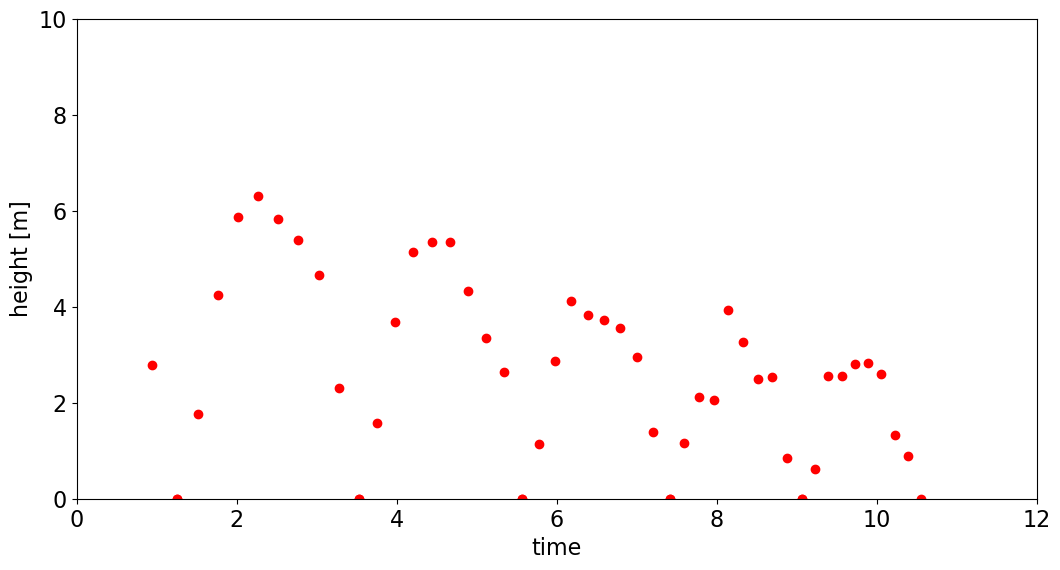

In [25]:
td, ud = np.genfromtxt('bounce_experiment.txt', delimiter = ',', skip_header=1).T[:,3:]
tennis_ball_plot(data = [td,ud])

Unfortunately, the camera broke halfway through the experiment. 

The goal was to determine **at what time the maximum bounce is less than 1.5m**. Because [reasons]. So, to achieve this, we will fit a model to the data, and then extrapolate it into the future.

***Change the model parameters in the cell below to get a good fit to the data.*** Try to get the objective function less than 12.

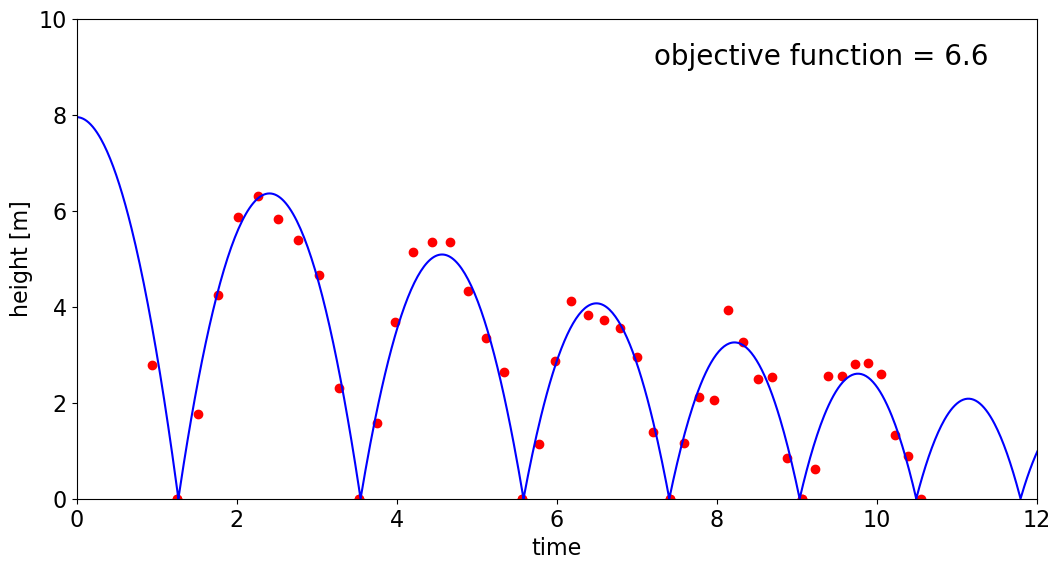

In [34]:
g = 9.81            # this experiment was performed on Earth
h0 = 7.95            # dunno, maybe?
e = 0.8             # dunno, maybe?
tennis_ball_plot(data = [td,ud], model = [g, h0, e])

Once you have a model that you are satisfied with, modify the plot limits to extrapolate it out and answer the question:

*"When does the ball's bounce apex drop below 1.5 m?"* 

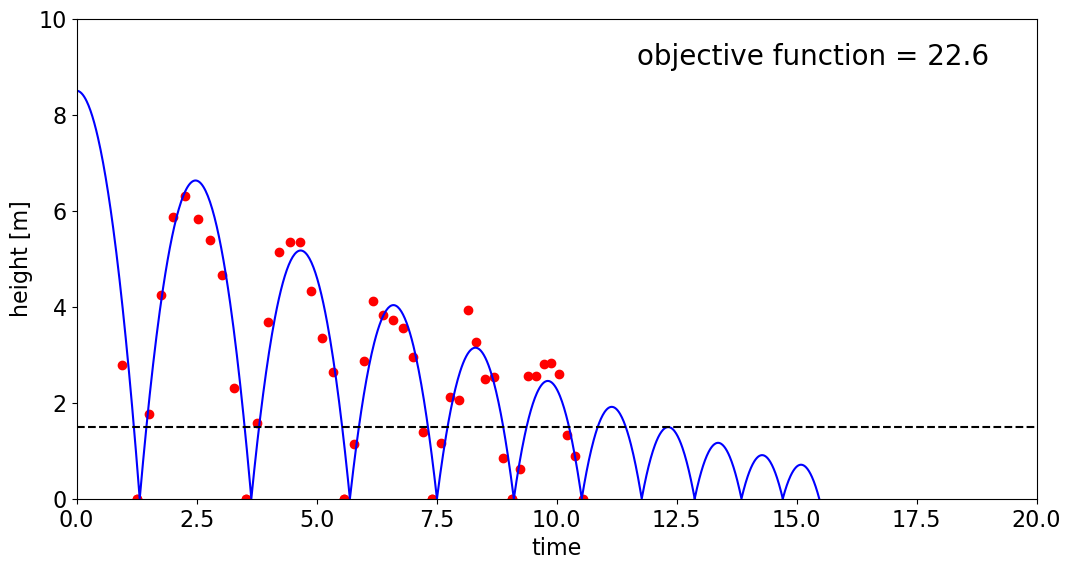

In [36]:
tmax = 20
tennis_ball_plot(data = [td,ud], model = [9.81, 8.5, 0.78], threshold=1.5, tmax = tmax)

***Inverse modelling***

-------------------

**You have been stranded on Mars!** Oh no...

All good, you can build yourself an escape vessel out of spare rover parts.

However, to complete the astronavigational computations, you need a value for acceleration due to gravity at the surface of Mars, $g_{MARS}$. Because there is no Google on Mars, you will need to perform the ball-drop-bounce experiment. Good thing you know the coefficient of restitution from a similar experiment on Earth (use your calibrated value above), so just calibrate the gravity term in your model to obtain a good fit with the data.

You perform the experiment, dropping the ball from the top of your habitat, 2.5m in height, and obtain the data below. Calibrate a model so you can escape!

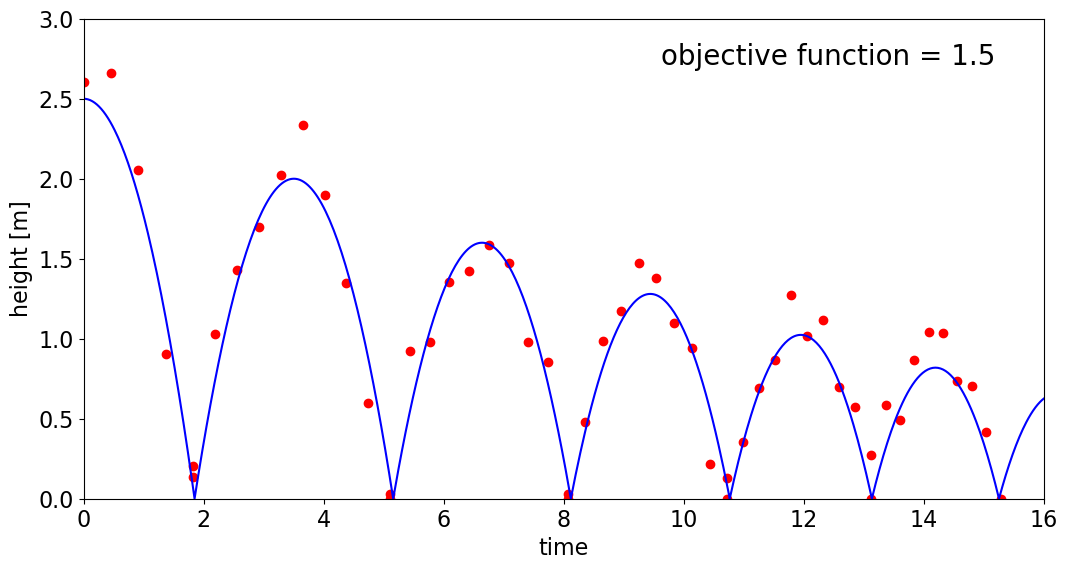

In [45]:
td, ud = np.genfromtxt('mars_experiment.txt', delimiter = ',', skip_header=1).T
tennis_ball_plot(data = [td,ud], tmax = 16, umax = 3, model=[1.46, 2.5, 0.8])

### 2.3 Numerical calibration

For models with a large number of parameters, or when there is not a good sense of how the system responds to changes in $\boldsymbol{\theta}$, then numerical methods of calibration may prove more effective than the ad-hoc approach. 

#### 2.3.1 Parameter space

We have expressed the input parameters to the model as a vector, $\boldsymbol{\theta}$. Therefore, any particular choice of parameters (called a unique parameterisation of the model) corresponds to a point in $N$-dimensional space with a set of axes for each of the $N$ parameters.

Take, for example, the car with damped shock absorption and assume that we know precisely the values of $m$ and $g$. In this case, the unknown parameters to be chosen in order to calibrate the model are $\boldsymbol{\theta}=[c,k]$. The allowed parameter combinations define a 2D plane in $c$-$k$ parameter-space with both the model prediction, $f(x_i;\boldsymbol{\theta})$, and the objective function, $S(\boldsymbol{\theta})$, surfaces<sup>2</sup> over that space (see Fig. 1). In this geometric interpretation, model calibration is the process of searching through parameter space to find the value(s), $\boldsymbol{\theta}_{min}$, that minimize $S(\boldsymbol{\theta})$. 

As we saw in the previous section, *ad-hoc* calibration is a sort of “feeling your way around in the dark” approach to determining this minimum. We will now consider *gradient descent*, an automated, numerical approach to calibration. One way to conceptualize gradient descent is to consider the question “*if we placed a ball on the surface of the plot below (run the next cell) and allowed it to roll, what path would it follow? Where would it come to rest?*”

<sup>2</sup> <sub>The geometric interpretation can be extended to $N$ parameters although it becomes difficult to visualise.</sub>

***Execute the cell below and answer the questions.***

In [47]:
parameter_space()

In [35]:
# Move the sliders c and k. The orange surface spans the ALLOWED parameter combinations.

# What plane does the point theta lie on?

# For each value of theta, there is a unique value S(theta). True or False?

# For each value S(theta), there is a unique value of theta. True or False?

# What is the goal of calibration, in terms of navigating the plotted surface?

# If S(theta) is the objective function, what would you expect to the plot 
# above if different weights were used for the observations?

#### 2.3.2 Parameter sensitivity

Before addressing those questions, it is useful to first explore the concept of *parameter sensitivity*. Consider, for example, the effect on a model output of an incremental change of the model parameters. From a Taylor expansion we have

\begin{equation}
f(x;\theta+\Delta\theta)=f(x;\theta) + \frac{\partial y}{\partial\theta} \Delta\theta=y+\Delta y
\end{equation}


where, for simplicity, we have considered only one parameter. From the equation above, we see how the partial derivative, $\partial y/\partial \theta$ – termed the *parameter sensitivity* – relates a change in the parameter to a change in the output. For the general case of the $j^{th}$ parameter and the $i^{th}$ output, the sensitivity is $\partial y_i/\partial \theta_j$, which corresponds to the $ij^{th}$ entry of the Jacobian matrix, $J_{ij}$.

Usually the model, $f(\cdot)$, is not expressed analytically, in which case the sensitivities are computed numerically, i.e.,

\begin{equation}
J_{ij}=\frac{f(\mathbf{x}_i;\boldsymbol{\theta}+\Delta\theta_j \boldsymbol{\epsilon}_j)-f(\mathbf{x}_i;\boldsymbol{\theta})}{\Delta\theta_j},
\end{equation}

where $\boldsymbol{\epsilon}_j$ is the unit vector in parameter space in the direction of $\theta_j$. The two terms in the numerator of the equation above each represent a single forward run of the model, i.e., two simulations are required to compute a single entry in the Jacobian. For $N$ parameters and fixed $i$, we can compute the $N$ sensitivities in $N+1$ model runs as the $f(\mathbf{x}_i;\boldsymbol{\theta})$ term is the same for all $J_{ij}$. 

Comparing the parameter sensitivities of complex models against our common sense expectations or physical intuition provides a sanity check that the model has been properly implemented<sup>3</sup>. Key red flags are when sensitivities have the wrong sign<sup>4</sup> or are stronger than expected<sup>5</sup>. 

When assured the model is properly implemented, examination of the parameter sensitivities is an excellent opportunity to gain (and communicate) insight into the physical processes underpinning the model. Such a *sensitivity analysis* might take the form of, for a particular output, a list of parameters ranked from most to least sensitive (for visualisation, one can use [tornado](https://en.wikipedia.org/wiki/Tornado_diagram) or [spider charts](https://en.wikipedia.org/wiki/Radar_chart)). It is also a useful precursor step to an analysis of model uncertainty, which will be discussed in a subsequent module.

More useful for calibration are the parameter sensitivities with respect to the objective function, i.e., 

\begin{equation}
\frac{\partial S}{\partial \theta_j}=\frac{S(\boldsymbol{\theta}+\Delta\theta_j\boldsymbol{\epsilon}_j)-S(\boldsymbol{\theta})}{\Delta \theta_j}.
\end{equation}

For the shock absorber example illustrated in ***Figure 1***, there are two parameter sensitivities - $\partial S/\partial c$ and $\partial S/\partial k$ – which form the components of the objective function sensitivity, $\mathbf{s}'$

\begin{equation}
	\mathbf{s}'=\frac{\partial S}{\partial c}\boldsymbol{\epsilon}_c+\frac{\partial S}{\partial k}\boldsymbol{\epsilon}_k=\left[\frac{\partial S}{\partial c},\frac{\partial S}{\partial k}\right].
\end{equation}

Because the components of $\mathbf{s}'$ depend on $\boldsymbol{\theta}$, the objective function sensitivity is actually a *vector field* over parameter space. We can define $\hat{\mathbf{s}}'=\mathbf{s}'/|\mathbf{s}'|$, which is a unit vector that points in a different direction depending on where one is currently positioned on the objective function surface. Importantly, -$\hat{\mathbf{s}}'$ points in the direction of steepest descent (the downhill direction). 

<sup>3</sup> <sub> See Design Notes, Section 1.2.7: “Is the model working correctly?”.</sub>

<sup>4</sup> <sub>“Hold up, when I increase this parameter, the model prediction should go down, not up…”</sub>

<sup>5</sup> <sub>“Hang on, changing this minor parameter has a much larger effect on the output than changing this major one, that’s not right...”</sub>

***Execute the cell below and answer the questions.***

In [48]:
sensitivity()

In [37]:
# Set sliders so that c=0.7 and k = 1.3.

# Perform computations in this cell 
# (write Python, Ctrl+Enter to execute, use print() if necessary)

# Compute the sensitivity vector:
#   - record the value of S
#   - increment the c slider by 1
#   - record the new value of S
#   - record the increment dc
#   - compute the sensitivity dS/dc
#   - reset the c slider to original position
#   - increment the k slider by 1
#   - record the new value of S
#   - record the increment dk
#   - compute the sensitivity dS/dk
#   - normalise the sensitivity vector
#   - check your answer is correct (check box)

# Leave 'check my answer' checked and move the slider bars.
# Describe the orientation of the arrow relative to the contours.

# What does it mean if the sensivity vector is zero? 

#### 2.3.3 Gradient descent

Returning now to the question “*if we placed a ball on the objective function surface and allowed it to roll, what path would it follow?*” We understand intuitively that the ball would initially accelerate in the direction of the steepest descent, i.e., -$\hat{\mathbf{s}}'$. Furthermore, if the ball continued to follow the path of steepest descent then it should eventually end up at the minimum<sup>6</sup>. This concept serves as the basis for *gradient descent* (also called the *method of steepest descent*). The steps are:

1. Choose $\boldsymbol{\theta}_0$, an initial guess of the parameter set that minimizes the objective function, $\boldsymbol{\theta}_{min}$.
2. Compute the direction of steepest descent at $\boldsymbol{\theta}_0$, i.e., -$\hat{\mathbf{s}}'(\boldsymbol{\theta}_0)$.
3. Update the estimate of $\boldsymbol{\theta}_{min}$ by incrementing in the direction of steepest descent, i.e., $\boldsymbol{\theta}_1=\boldsymbol{\theta}_0-\alpha \hat{\mathbf{s}}'(\boldsymbol{\theta}_0)$. 
4. Repeat steps 2 and 3 to improve the estimate of $\boldsymbol{\theta}_{min}$, i.e., $\boldsymbol{\theta}_{i+1}=\boldsymbol{\theta}_i-\alpha \hat{\mathbf{s}}'(\boldsymbol{\theta}_i)$. Providing the step, $\alpha$, is small enough, this algorithm will satisfy $S(\boldsymbol{\theta}_{i+1})<S(\boldsymbol{\theta}_{i})$, i.e., each update is a better estimate (the residual is smaller) than the previous.

***Execute the cell below for a visualisation of gradient descent.***

In [49]:
gradient_descent()

In [23]:
# Use the sliders to set initial path position to c = 0.75 and k = 1.3

# Use the slider to increase the number of gradient descent steps. 
# Describe the trajectory of the path.

# Increase alpha. Will it take MORE or LESS computation to find the minimum?

# Are there any disadvantages to increasing alpha?

# Change the initial path position to c = 0.8 and k = 1.3
# Describe the outcome of gradient descent.

#### 2.3.4 Drawbacks

Gradient descent is a relatively simple optimization technique that will struggle to find the minimum for some certain classes of functions<sup>7</sup>. As the method involves approximation of the first derivative, it relies on a smooth, differentiable objective function. Other methods use higher derivative approximations to find the minimum with less steps, e.g., *[Newton’s method](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization)*, which uses information about the function curvature (second derivative).

Numerical methods of calibration still rely on expert knowledge and human intuition in the selection of $\boldsymbol{\theta}_0$, which should be selected as near as possible to $\boldsymbol{\theta}_{min}$. Like other optimization techniques, gradient descent locates a *local minimum*, which may or may not be the *global minimum*. For example, if you have worked through the exercise above, you will have seen how a steepest descent path beginning with a large value of $c$ does not find $\boldsymbol{\theta}_{min}$ but instead drifts towards one edge of the parameter space. One way to determine if the objective function has multiple minima is to consider a set of starting points (i.e., $[\boldsymbol{\theta}_{0,1},\boldsymbol{\theta}_{0,2},...\boldsymbol{\theta}_{0,i}]$) that span the allowed parameter space in an efficient manner<sup>8</sup>, and then apply gradient descent (or another local optimization technique) for each of these.

<sup>7</sup> <sub>Thus, it may fail to determine $\boldsymbol{\theta}_{min}$ when $S(\boldsymbol{\theta})$ has similar characteristics to those functions.</sub>

<sup>8</sup> <sub>See, for example, space-filling techniques like [Latin-Hypercube](https://en.wikipedia.org/wiki/Latin_hypercube_sampling) sampling.</sub>


### 2.4 Inverse modelling

Suppose we wish to make a measurement of the quantity, $\phi$, but it is impractical to measure it directly, e.g., $\phi$ could be the electrical resistivity of a volume of rock buried 10 km underground. However, we do know of a different quantity, $\gamma$, that depends on $\phi$ and which is much easier to measure, e.g., $\gamma$ might be a measurement of the electric field at the Earth’s surface. The relationship between the two variables is expressed by the (possibly numerical) model, $\gamma=g(\mathbf{x};\phi)$. However, $g(\cdot)$ is not invertible, i.e., we cannot write $\phi=g^{-1}(\mathbf{x};\gamma)$ and then obtain an estimate of $\phi$ directly from a measurement of $\gamma$.

*Inverse modelling* seeks to determine the value of $\phi$ from the measurement of $\gamma$ via a numerical method of model calibration, i.e., by finding the value $\phi_{min}$ which minimizes the objective function, $S(\phi)$, for observation, $\tilde{\gamma}$. Often, the optimization approach is specific to the features of $g(\cdot)$ or the structure of $S(\phi)$, and sometimes additional constraints or conditions are required. In the following sections, two examples of inverse modelling from the Earth sciences are discussed<sup>9</sup>.

In practical situations, both the model and the observations used to calibrate it are subject to some degree of uncertainty. This means that, rather than estimating the parameter value, $\phi$, we should instead estimate some uncertain interval, $[\phi_{lo},\phi_{hi}]$, which we believe contains the true (unobservable) value $\phi$. In this context, it is useful to revisit the notion of *parameter sensitivity*: generally speaking, the more sensitive a parameter is to the observations it predicts, the narrower we will be able to estimate the uncertain interval, $[\phi_{lo},\phi_{hi}]$<sup>10</sup>. We will treat this topic more rigorously in a later module.

<sup>9</sup> <sub> Note, you will not be examined on the physics specific to these examples. However, you are expected to be able to apply general inverse modelling concepts in a specific situation.</sub>

<sup>10</sup> <sub>Stated differently, the higher the parameter sensitivity, the more information the observations are giving us about that parameter.</sub>


#### 2.4.1 Magnetotelluric imaging

[Magnetotellurics](https://en.wikipedia.org/wiki/Magnetotellurics) (MT) is a geophysical method for imaging underground zones of high and low electrical resistivity. This is important as zones of low resistivity could indicate oil in permeable rock, the presence of an impermeable clay caprock above a geothermal reservoir, or the presence of a mineral ore body. 

First, measurements are collected of the strength and direction of Earth’s electric field, $\tilde{\mathbf{E}}$, at different oscillation frequencies ($\omega$), and at different locations at the surface (called the station locations, at $\mathbf{x}_s=[x,y,0]$). The mathematics linking $\mathbf{E}(\mathbf{x}_s,\omega)$ to the three-dimensional electrical resistivity distribution of underground rock, $\rho(\mathbf{x})$ (where $\mathbf{x}=[x,y,z]$) are relatively straightforward to implement in the forward model, $MT(\cdot)$. Second, one sets up a 3D model grid corresponding to the volume of rock beneath the surface stations. Each individual grid block is assigned its own resistivity<sup>11</sup>, $\rho_i=\rho(\mathbf{x}_i)$, and this becomes a parameter in $MT(\cdot)$. Thus, each individual grid block potentially has a different resistivity to its neighbours and the resistivity distribution is said to be spatially heterogeneous. Finally, the values $\rho_i$ are determined by calibrating $MT(\mathbf{x}_s;\rho_i)$ such that the predicted $\mathbf{E}(\mathbf{x}_s,\omega)$ agree with the observations, $\tilde{\mathbf{E}}(\mathbf{x}_s,\omega)$. 


<img src="img/MT.png" alt="Drawing" style="width: 600px;"/>

***Figure 3: Should we drill our $\$$15 million well in position A, B or C? An MT survey works by (i) deploying (green) stations at $\mathbf{x}_s$, (ii) recording $\mathbf{E}$ at different frequencies, $\omega$, and then (iii) inverting a model which has a 'blocky' representation of $\rho_i$. The aim is to find which blocks have high resistivity, $\rho_{oil}$***

The principle challenge facing an MT inversion is that there are typically many more parameters than observations with which to calibrate the model. Thus, many different distributions of $\rho_i$ could potentially fit the observations and the problem is said to be *ill-posed*. One way to make progress with such problems is through *regularisation*, which provides additional information to the optimization algorithm to help it choose between a set of equally-good inversions, $[\rho_{i,0},\rho_{i,1}\dots \rho_{i,n}]$. Usually, the regularisation will prefer the smoothest distribution of $\rho_i$ (least deviation between neighbouring values) as the solution.

<img src="img/MT2.png" alt="Drawing" style="width: 600px;"/>

***Figure 4: Example output of an MT inversion (right) of a simple known resistivity distribution (left). The main feature is a conductive clay cap (blue) over a geothermal system. The inversion recovers the approximate location, extent and depth of the clay cap. However, regularisation prevents the inversion recovering sharp boundaries, instead preferring to smooth these out.*** 

<sup>11</sup> <sub> An implicit assumption here is that the grid block resistivity is some average representation of the (probably) nonuniform rock resistivity present at scales smaller than the grid block dimension.</sub>


#### 2.4.2 Fault slip inversion

An inverse modelling technique that you will apply in the lab is use of an Okada elastic dislocation solution<sup>12</sup> to estimate the kinematic properties of fault rupture following a large earthquake. In this case, the forward model relates observations of displacement vector, $\tilde{\mathbf{d}}$, at surface locations, $\mathbf{x}_s$, (these are typically obtained by GPS measurements) to the model parameters: (i) fault orientation (parameterized by three angles, $[\vartheta,\phi,\psi]$), (ii) fault dimension - length, $L$, and height, $H$, (iii) fault depth below the surface, $z$, (iv) the average amount of slip, $u$ (relative displacement across the fault interface) that occurred during the earthquake, and (v) the shear modulus of the rock, $G$. 

The forward Okada model, $\mathbf{d}=OK(\mathbf{x}_s;\boldsymbol{\theta})$ where $\boldsymbol{\theta}=[\vartheta,\phi,\psi,L,H,z,u,G]$, is reasonably quick to run and therefore the gradient descent algorithm can afford to take quite a number of steps through parameter space searching for an optimal solution. Once the parameters are estimated, earthquake magnitude, $M$, is calculated using the expression

\begin{equation}
M=\frac{2}{3}\log⁡\left(GLHu\right)-6.
\end{equation}

This can then be compared to the magnitude estimated from seismological techniques.

Here, we have used inverse modelling as a tool to extract information (parameter values) from data (observations). We can attempt to extract *more* information from the data by increasing the complexity of the model, essentially adding new parameters. Each additional parameter that is constrained represents some knowledge gain of the system. For the Okada example, we might consider replacing the single-parameter, constant-slip model, $u$, with a general slip distribution, $u_i$ (i.e., slip at each of $N$ discretized points on the fault is an independent parameter) similar to the general resistivity distribution, $\rho_i$, sought by MT inversion. However, as for MT, introduction of more parameters degrades the *information available to calibrate each parameter* in the model. This increases the likelihood of ill-posedness and the need for regularisation. 

<sup>12</sup> <sub> The Okada solution uses a simple expression relating the displacement vector at an arbitrary location on the Earth’s surface to an incremental dislocation below ground; the total ground surface displacement in response to an earthquake (which is caused by a non-uniform dislocation on a buried fault) is then constructed by integrating the elastic response of all the incremental dislocations comprising the rupture (Okada, 1992).</sub>


### 2.5 Perils and pitfalls

Calibration seeks to improve the match between model predictions and observations. However, just because a calibrated model fits the observations does not guarantee that the model: (i) is *working* correctly<sup>13</sup>, (ii) contains the appropriate physics, (iii) will provide a reliable prediction of future outcomes, or (iv) is uniquely parameterized. The latter three points are expanded on below.

<sup>13</sup> <sub>  That is, free of bugs or errors, see *question 7* in the Design notes.</sub>

#### 2.5.1 Appropriate representation of problem physics

As an example, at small scales (spatial or temporal) many physical processes are approximately linear. Thus, linear regression (calibration of a two-parameter linear model) might provide a moderately good fit to the data. However, this requires no specific understanding (or numerical treatment) of the underlying physics. In many cases this is sufficient, especially where the purpose of the model is interpolation or short-term prediction.

#### 2.5.2 Prediction and local calibration

Models often contain parameters that vary spatially, e.g., in the case of MT, the resistivity distribution, $\rho_i$; or, for the Wairakei reservoir model, rock permeability. If observations are made at the location, $\mathbf{x}_s$, then it is reasonable to expect the parameters nearest to $\mathbf{x}_s$ to have the highest sensitivity to those observations: they will be the most accurately estimated parameters during calibration. In this case, the model is said to be locally calibrated. The quality of subsequent predictions will depend on whether they are more or less sensitive to (i) the well constrained parameters near to the observations, or (ii) the poorly constrained parameters further away.

As an example, consider again the Wairakei reservoir model, which encompasses two neighbouring geothermal fields: Wairakei and Tauhara, approximately separated by the Waikato River (Figure 3). Historically, production and exploration have been focused in the Wairakei system northwest of the river and, consequently, permeabilities in the reservoir model are quite well-calibrated in this region. Predictions made decades ago (using an earlier version of the model) of production at Wairakei have proved to be reliable. The model’s current forecasts are used during resource consenting of the field. 

<img src="img/wairakei.png" alt="Drawing" style="width: 500px;"/>

<div style="text-align: center"> ***Figure 3: Extent of the Wairakei reservoir model (black grid lines) in the context of the combined Wairakei-Tauhara geothermal system (red outline), the Waikato River (blue) and Taupo township (green). Adapted from O’Sullivan et al. (2009).*** </div> 

However, there are comparatively fewer observations<sup>14</sup> available within the Tauhara system, southeast of the Waikato River. Consequently, there is less constraint on permeability values and the quality of model calibration is poorer. Predictions made about future production from the Tauhara field are less reliable than for Wairakei. 

An analysis like this provides a useful basis for making iterative improvements to a model (Design notes, question 9). For instance, we might start by asking “*does the model fulfil its purpose in predicting, say, the response of the Tauharua system?*” (Design notes, question 8) In this case, the answer is “not adequately”. We know that calibration is good in some locations (Wairakei) and poor in others (Tauhara), thus the goal is not to improve calibration overall but to improve calibration of part of the model. Having established where calibration needs to be improved (Tauhara), we can use the parameter sensitivities to determine how to go about this. Recall, the parameter sensitivities are essentially telling us how much we can learn about a particular parameter from a given observation. For instance, we are unlikely to learn much about the permeability at Tauhara, $k_{TH}$, from a measurement of pressure at Wairakei, $P_{WK}$, 10 km away: the parameter sensitivity, $\partial P_{WK}/\partial k_{TH}$ is small. In contrast, measurements of pressure at Tauhara, $P_{TH}$, do tell us quite a lot about the permeability, $k_{TH}$ ($\partial P_{TH}/\partial k_{TH}$ is large) and thus we should concentrate our efforts on making these measurements (perhaps by drilling an exploration well at Tauhara). In this sense, parameter sensitivities are useful means of quantifying the *value of additional data*.

<sup>14</sup> <sub> Temperature, pressure or flow rate measurements in wells.</sub>

#### 2.5.3 Non-unique parameterisation

In the discussion above on inverse modelling we stated that, when there are errors in the observations, calibration should estimate a parameter interval, $[\phi_{lo},\phi_{hi}]$, rather than a parameter value, $\phi$. We can express this outcome differently: 

<div style="text-align: center"> “*There is more than one set of parameters that yields a model consistent with observation.*”</div>

In Section 1.4.1, we saw how regularisation provides a way to choose between these different sets of parameters (and hence a set of models). 

However, it is also acceptable to settle for a set of reasonably well-calibrated models rather than a single best-calibrated instance. A set of models expresses the idea that, truly, we don’t know which one is the best model, although we do think it is contained within the set. A set of models can be used to make a corresponding set of predictions about the future, allowing for a (possibly probabilistic) spectrum of outcomes. We will return to this idea in a later module.


#### 2.5.4 Superparameters

Depending on how the model is formulated and the observations that are available, it may only be possible for calibration to constrain the value of a parameter combination: a *superparameter*.

As a trivial example, consider the damped car suspension model first developed in the Design notes. We might choose to increase the model’s complexity by splitting the spring term into four components, one for each of the car’s wheels, which act in parallel, i.e., $\frac{1}{k}=\frac{1}{k_1} +\frac{1}{k_2} +\frac{1}{k_3} +\frac{1}{k_4}$ . Assuming that the other parameters, $c$, $g$ and $m$ are known, and that we also have some observations of displacement, $\tilde{u}_i$ at $t_i$, then we can use inverse modelling to determine the value of $k$. However, in the model’s current form, we cannot independently constrain the individual spring stiffnesses, $k_i$. Thus, in this example, $k$ is a superparameter.

As another example, consider Darcy’s law (neglecting gravity), describing the flux of water, $q$, through a permeable medium, expressed as

\begin{equation}
q=-\frac{k}{\mu}\frac{dP}{dx}
\end{equation}

where $dP/dx$ is the pressure gradient, $k$ is the permeability of the medium through which the water is flowing, and $\mu$ is the viscosity of water. Say we perform an experiment in which water flows through a pile of sand at some controlled pressure gradient, $dP/dx$, and the corresponding flux rate, $q$, is measured. This information would be sufficient to estimate the superparameter, $k/\mu$, but not $k$ or $\mu$ individually.


### References

O’ Sullivan, M. J., A. Yeh, and W. I. Mannington (2009). *A history of numerical modelling of the Wairakei geothermal field.* Geothermics 38, 155-168.

Okada, Y. (1992). *Internal deformation due to shear and tensile faults in a half-space.* Bulletin of the Seismological Society of America 82, 1018-1040.
